In [ ]:
#Attrition Prediction in Human Resources / People Team
#In this project, we try to predict employee's attrition based on their age, gender, salary, tenure, marital status
#engagement survey score, employee's satisfaction score and perfrmance review score

In [1]:
#impoting relevant packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
#impotring dataset
hr = pd.read_csv(r'C:\Users\Shmuel\Desktop\Projects\HR\HR - Cleaned V2.csv')

In [96]:
#exploring the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EmpID                       310 non-null    int64  
 1   MarriedID                   310 non-null    int64  
 2   MaritalStatusID             310 non-null    int64  
 3   EmpStatusID                 310 non-null    int64  
 4   DeptID                      310 non-null    int64  
 5   PerfScoreID                 310 non-null    int64  
 6   FromDiversityJobFairID      310 non-null    int64  
 7   PayRate                     310 non-null    float64
 8   Termd                       310 non-null    int64  
 9   PositionID                  310 non-null    int64  
 10  Position                    310 non-null    object 
 11  State                       310 non-null    object 
 12  DOB                         310 non-null    object 
 13  Age                         310 non

In [4]:
hr.head()

,EmpID,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,1103024456,1,1,1,1,3,1,28.50,0,1,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2,6,1/15/2019,0.0
1,1106026572,0,2,1,1,3,0,23.00,0,1,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4,4,1/17/2019,0.0
2,1302053333,0,0,1,1,3,0,29.00,0,1,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5,5,1/18/2019,0.0
3,1211050782,1,1,1,1,3,0,21.50,1,2,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3,4,NaN,NaN
4,1307059817,0,0,1,1,3,0,16.56,0,2,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3,5,1/15/2019,0.0


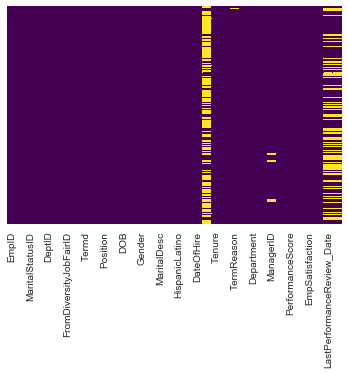

In [97]:
#Visualising null cells
sns.heatmap(hr.isnull(),yticklabels=False,cbar=False,cmap='viridis')

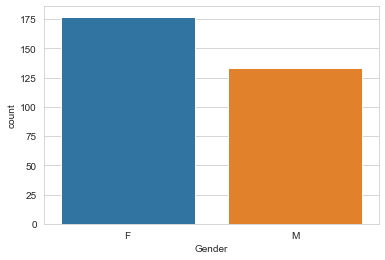

In [10]:
#EDA
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=hr)

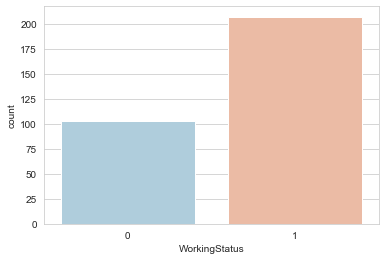

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='WorkingStatus',data=hr,palette='RdBu_r')

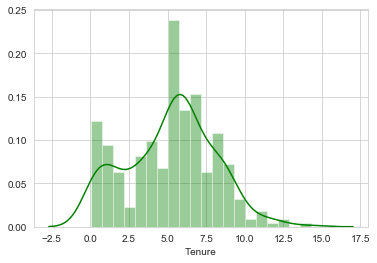

In [21]:
sns.distplot(hr['Tenure'],bins=20,hist=True,kde=True,color='green')

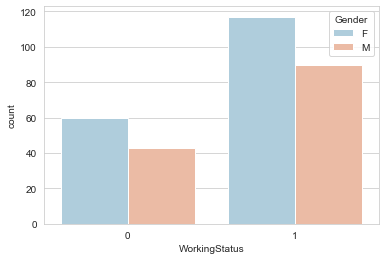

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='WorkingStatus', hue='Gender',data=hr,palette='RdBu_r')

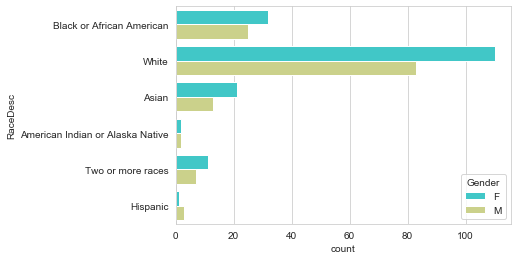

In [29]:
sns.set_style('whitegrid')
sns.countplot(y='RaceDesc',hue='Gender',data=hr,palette='rainbow')

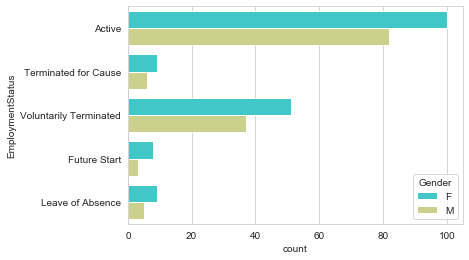

In [32]:
sns.set_style('whitegrid')
sns.countplot(y='EmploymentStatus',hue='Gender',data=hr,palette='rainbow')

In [33]:
#Interactive visualisation
import cufflinks as cf
cf.go_offline()

In [175]:
hr['MaritalDesc'].iplot(kind='hist',bins=30,color='blue',title='Marital Description Distribution',width=2)

In [207]:
#Training a Linear Regression Mode

#Converting categorical features MaritalDesc & PerformanceScore into dummy variables

MaritalDescDum = pd.get_dummies(hr['MaritalDesc'],drop_first=True)
hr = hr.join(MaritalDescDum)

PerformanceScoreDum = pd.get_dummies(hr['PerformanceScore'],drop_first=True)
hr = hr.join(PerformanceScoreDum)

In [208]:
#X and y arrays
hr.columns

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID', 'DeptID',
       'PerfScoreID', 'FromDiversityJobFairID', 'PayRate', 'Termd',
       'PositionID', 'Position', 'State', 'DOB', 'Age', 'Gender', 'GenderID',
       'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateOfHire', 'DateofTermination', 'Tenure', 'WorkingStatus',
       'TermReason', 'EmploymentStatus', 'Department', 'ManagerName',
       'ManagerID', 'RecruitmentSource', 'PerformanceScore',
       'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount',
       'LastPerformanceReview_Date', 'DaysLateLast30', 'Married', 'Separated',
       'Single', 'Widowed', 'Fully Meets', 'Needs Improvement', 'PIP'],
      dtype='object')

In [209]:
X=hr[['Age','GenderID','Tenure','EngagementSurvey','EmpSatisfaction','Married', 'Separated',
       'Single', 'Widowed', 'Fully Meets', 'Needs Improvement', 'PIP']]
y=hr[['WorkingStatus']]

In [210]:
#Building a Logistic Regression model
from sklearn.model_selection import train_test_split

In [211]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [212]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression

In [213]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shmuel\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Shmuel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
predictions = logmodel.predict(X_test)

In [215]:
#Model evaluation
from sklearn.metrics import classification_report, confusion_matrix

In [216]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        40
           1       0.93      0.90      0.92        84

    accuracy                           0.89       124
   macro avg       0.87      0.88      0.87       124
weighted avg       0.89      0.89      0.89       124



In [217]:
cf_matrix = confusion_matrix(y_test,predictions)
cf_matrix

array([[34,  6],
       [ 8, 76]], dtype=int64)

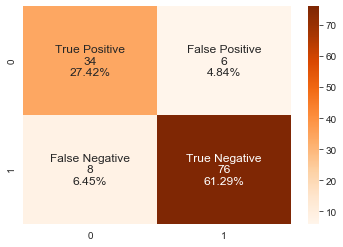

In [227]:
#Visualising confusion matrix
names = ['True Positive','False Positive','False Negative','True Negative']
counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Oranges',annot_kws={"size": 12})